### Import Libraries

In [1]:
import pandas as pd # Data processing 
import numpy as np 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import missingno as msno # Missing Data - Data visualisation
from collections import Counter #Counting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Load Data

In [4]:
df = pd.read_csv("drug_discovery_virtual_screening.csv")
df.head()

,compound_id,protein_id,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
0,CID_00000,PID_361,499.671415,2.487233,1,7,4,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665,0
1,CID_00001,PID_165,436.173570,3.283222,3,4,4,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742,0
2,CID_00002,PID_168,514.768854,NaN,2,11,11,83.936307,1.869610,658,3.925837,0.633467,13.155702,0.782323,9.074061,5.689583,0
3,CID_00003,PID_226,602.302986,3.038058,0,5,5,79.868125,2.451909,312,7.597056,0.513038,12.071822,1.930458,23.080293,6.043438,0
4,CID_00004,PID_224,426.584663,0.659578,2,4,5,88.198676,1.771936,1418,4.249454,0.613571,15.850448,0.300835,2.802846,4.845055,0


In [5]:
df.shape

(2000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compound_id          2000 non-null   object 
 1   protein_id           2000 non-null   object 
 2   molecular_weight     2000 non-null   float64
 3   logp                 1940 non-null   float64
 4   h_bond_donors        2000 non-null   int64  
 5   h_bond_acceptors     2000 non-null   int64  
 6   rotatable_bonds      2000 non-null   int64  
 7   polar_surface_area   1940 non-null   float64
 8   compound_clogp       2000 non-null   float64
 9   protein_length       2000 non-null   int64  
 10  protein_pi           2000 non-null   float64
 11  hydrophobicity       1940 non-null   float64
 12  binding_site_size    2000 non-null   float64
 13  mw_ratio             2000 non-null   float64
 14  logp_pi_interaction  2000 non-null   float64
 15  binding_affinity     2000 non-null   f

In [7]:
df.columns

Index(['compound_id', 'protein_id', 'molecular_weight', 'logp',
       'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds',
       'polar_surface_area', 'compound_clogp', 'protein_length', 'protein_pi',
       'hydrophobicity', 'binding_site_size', 'mw_ratio',
       'logp_pi_interaction', 'binding_affinity', 'active'],
      dtype='object')

In [8]:
df.describe()

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
count,2000.000000,1940.000000,2000.000000,2000.000000,2000.00000,1940.000000,2000.000000,2000.00000,2000.000000,1940.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,456.772168,3.479480,1.961000,5.115000,5.96850,80.026470,2.813403,848.92600,6.460332,0.645325,15.155982,0.708989,22.598329,6.531228,0.304000
std,104.874658,1.638638,1.348105,2.330985,2.40778,25.344944,1.188590,380.83777,1.210236,0.095419,2.997837,0.475588,10.918200,1.194584,0.460098
min,50.307070,-4.325172,0.000000,0.000000,0.00000,-24.653688,-1.426170,201.00000,2.597565,0.332013,4.655871,0.097804,-6.624581,1.990381,0.000000
25%,388.747480,2.419505,1.000000,3.000000,4.00000,63.166240,2.006000,509.50000,5.615083,0.577986,13.144847,0.383770,14.826016,5.856086,0.000000
50%,454.869085,3.501416,2.000000,5.000000,6.00000,80.606617,2.773587,844.00000,6.473527,0.647452,15.237835,0.532021,21.858904,6.480304,0.000000
75%,520.982885,4.518801,3.000000,7.000000,7.00000,97.366501,3.620260,1192.00000,7.270822,0.711428,17.184475,0.867184,29.526168,7.164685,1.000000
max,994.048532,9.978489,8.000000,15.000000,17.00000,159.627362,6.891681,1499.00000,10.266937,0.978030,24.887713,3.403706,76.998672,15.039709,1.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
molecular_weight,2000.0,456.772168,104.874658,50.307070,388.747480,454.869085,520.982885,994.048532
logp,1940.0,3.479480,1.638638,-4.325172,2.419505,3.501416,4.518801,9.978489
h_bond_donors,2000.0,1.961000,1.348105,0.000000,1.000000,2.000000,3.000000,8.000000
h_bond_acceptors,2000.0,5.115000,2.330985,0.000000,3.000000,5.000000,7.000000,15.000000
rotatable_bonds,2000.0,5.968500,2.407780,0.000000,4.000000,6.000000,7.000000,17.000000
polar_surface_area,1940.0,80.026470,25.344944,-24.653688,63.166240,80.606617,97.366501,159.627362
compound_clogp,2000.0,2.813403,1.188590,-1.426170,2.006000,2.773587,3.620260,6.891681
protein_length,2000.0,848.926000,380.837770,201.000000,509.500000,844.000000,1192.000000,1499.000000
protein_pi,2000.0,6.460332,1.210236,2.597565,5.615083,6.473527,7.270822,10.266937
hydrophobicity,1940.0,0.645325,0.095419,0.332013,0.577986,0.647452,0.711428,0.978030


In [10]:
df.isnull().sum()

compound_id             0
protein_id              0
molecular_weight        0
logp                   60
h_bond_donors           0
h_bond_acceptors        0
rotatable_bonds         0
polar_surface_area     60
compound_clogp          0
protein_length          0
protein_pi              0
hydrophobicity         60
binding_site_size       0
mw_ratio                0
logp_pi_interaction     0
binding_affinity        0
active                  0
dtype: int64

### Handling Missing Values

In [11]:
df['logp'] = df['logp'].fillna(df['logp'].mean())
df['polar_surface_area'] =df['polar_surface_area'].fillna(df['polar_surface_area'].mean())
df['hydrophobicity'] = df['hydrophobicity'].fillna(df['hydrophobicity'].mean())

In [12]:
df.isnull().sum()

compound_id            0
protein_id             0
molecular_weight       0
logp                   0
h_bond_donors          0
h_bond_acceptors       0
rotatable_bonds        0
polar_surface_area     0
compound_clogp         0
protein_length         0
protein_pi             0
hydrophobicity         0
binding_site_size      0
mw_ratio               0
logp_pi_interaction    0
binding_affinity       0
active                 0
dtype: int64

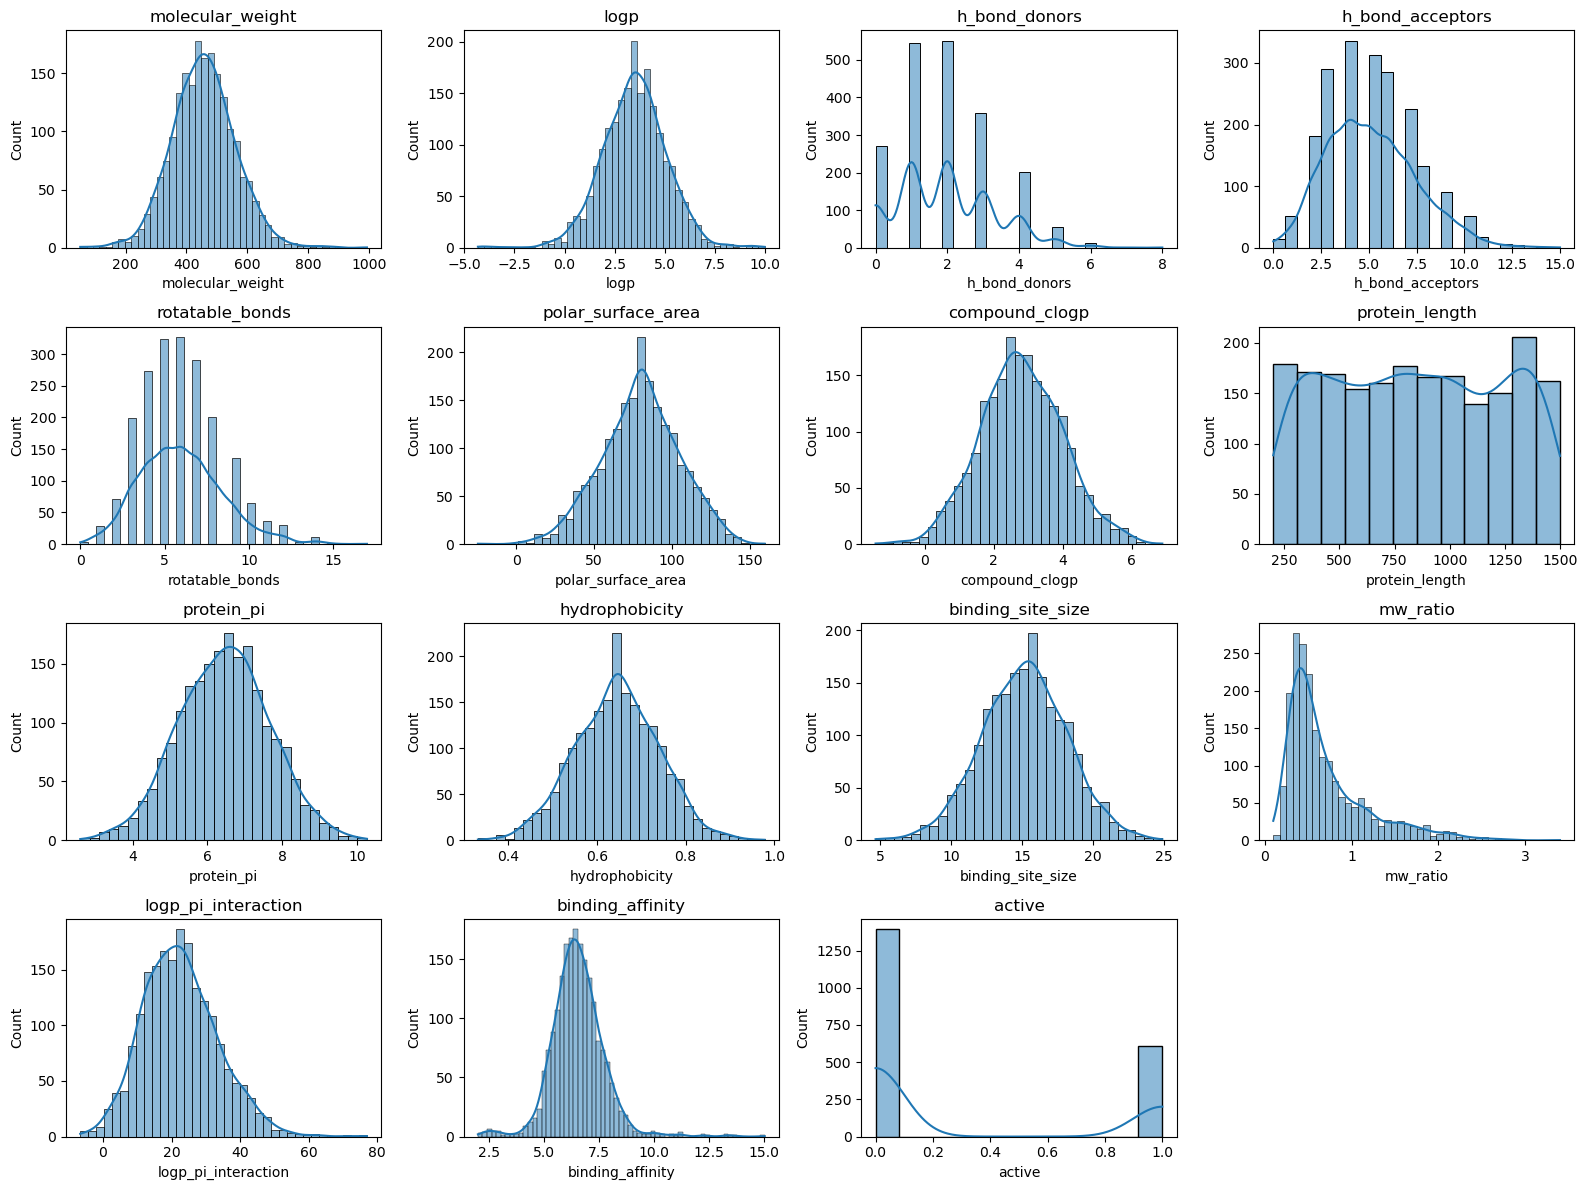

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

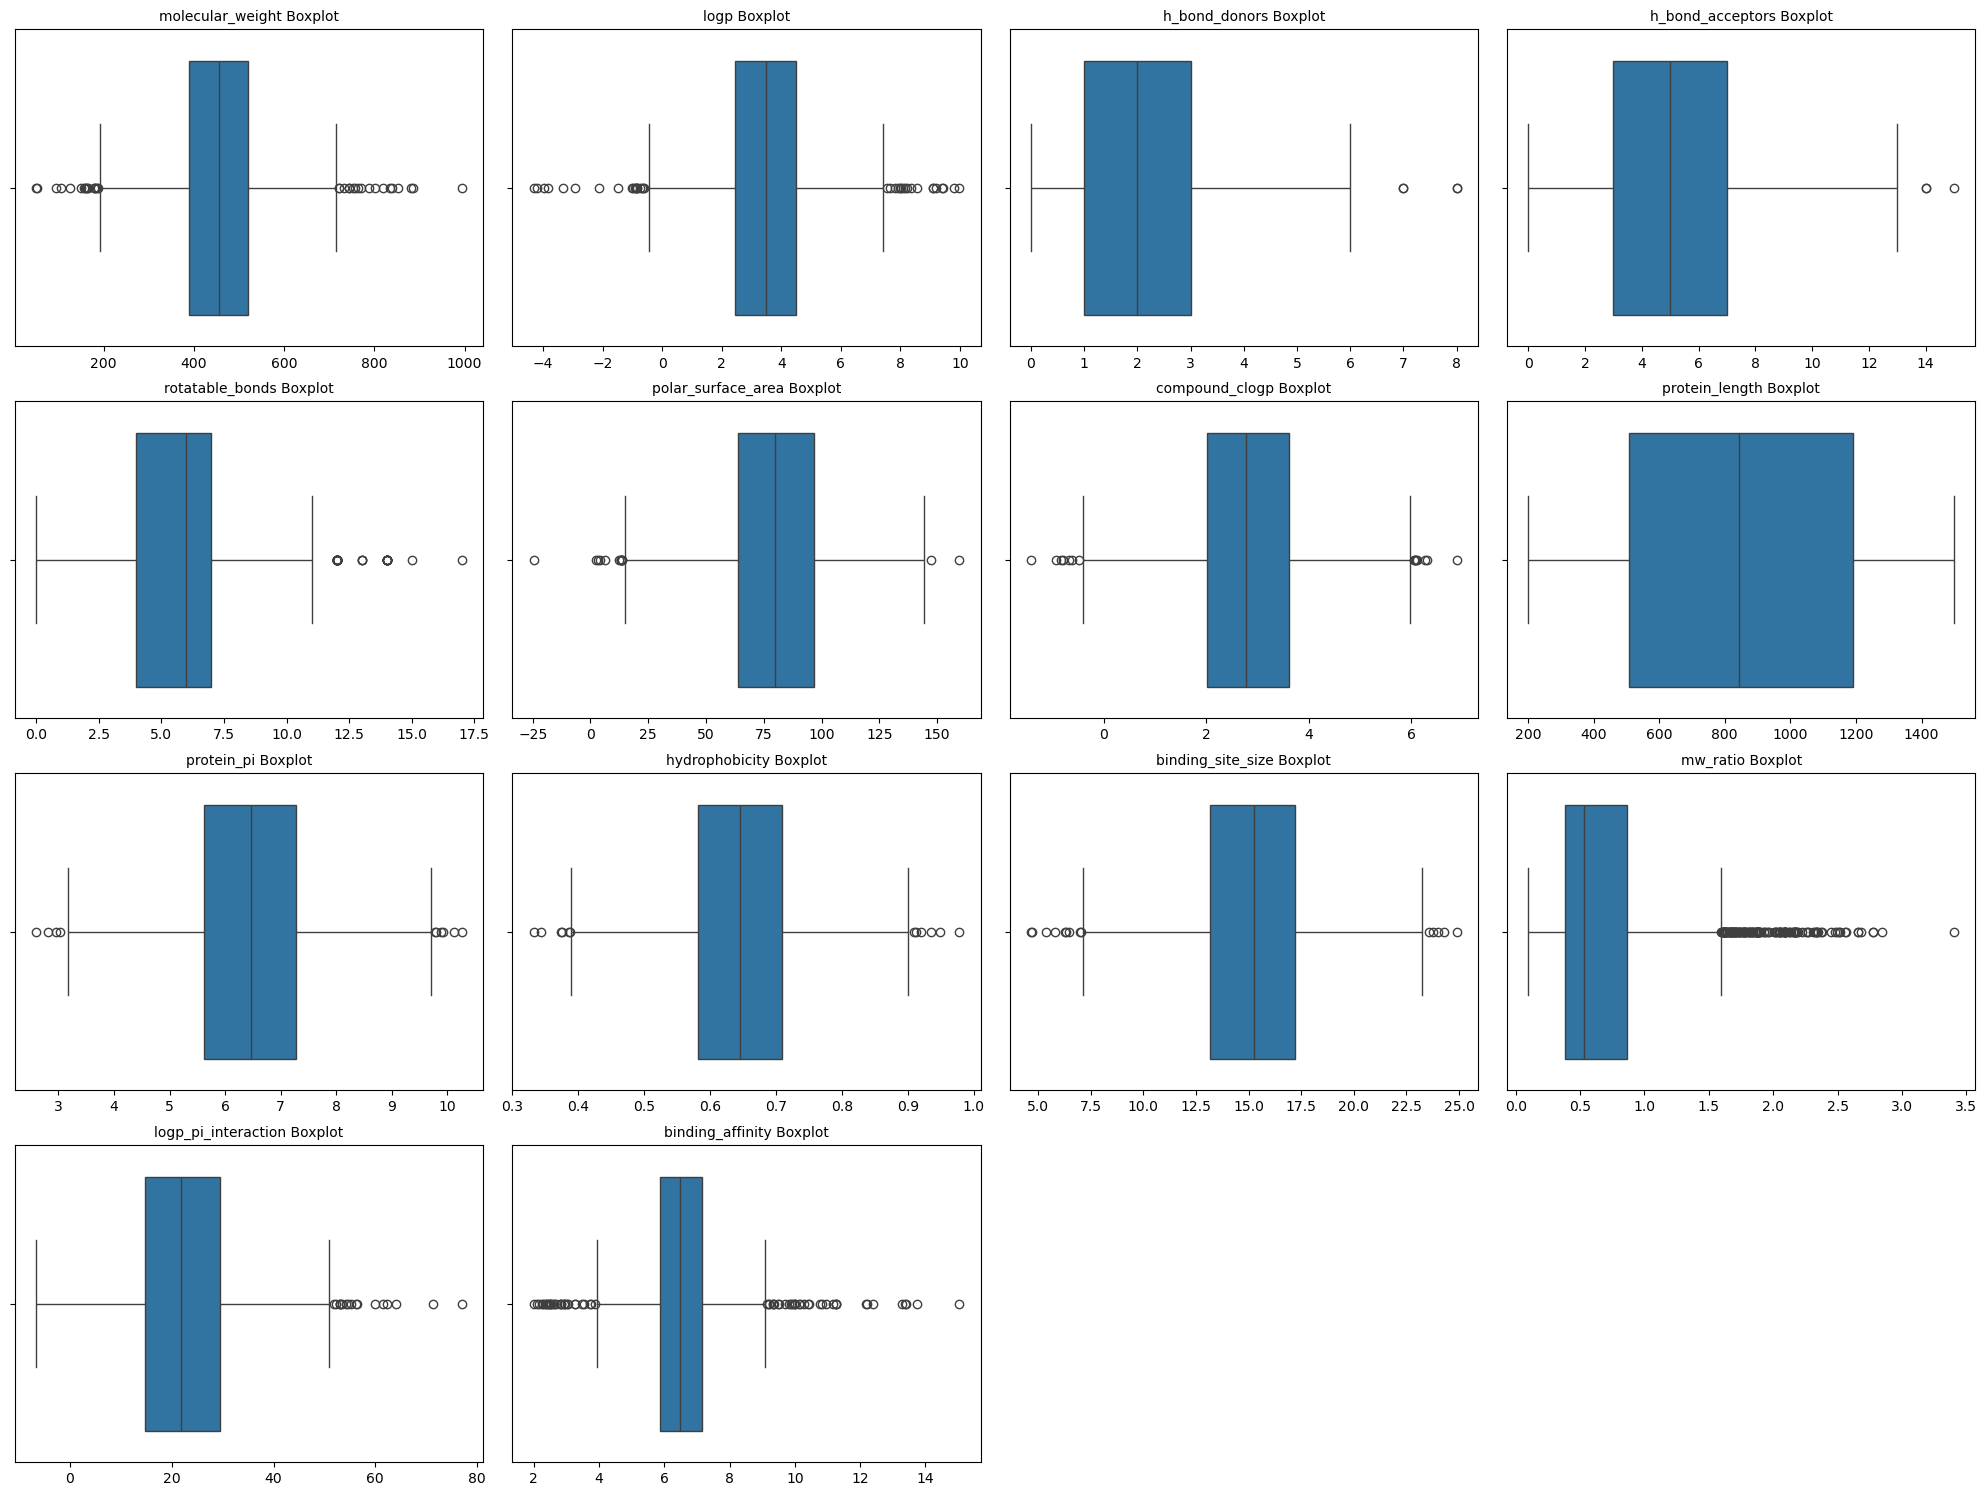

In [14]:
import math

def visualize_df(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_columns.pop() # remove active

    n_cols = 4
    n_rows = math.ceil(len(numeric_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"{col} Boxplot", fontsize=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("") 

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

visualize_df(df)

### Handling Outliers

In [15]:
# Handling Outliers
numeric_columns = ['molecular_weight', 'logp', 'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'polar_surface_area', 'compound_clogp', 'protein_pi', 'hydrophobicity', 'binding_site_size', 'mw_ratio', 'logp_pi_interaction', 'binding_affinity']
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Winsorization: Cap outliers instead of removing them
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        
        print(f"Outliers handled for '{col}' | Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    return df

df = handle_outliers(df, numeric_columns)

Outliers handled for 'molecular_weight' | Lower bound: 190.39, Upper bound: 719.34
Outliers handled for 'logp' | Lower bound: -0.59, Upper bound: 7.53
Outliers handled for 'h_bond_donors' | Lower bound: -2.00, Upper bound: 6.00
Outliers handled for 'h_bond_acceptors' | Lower bound: -3.00, Upper bound: 13.00
Outliers handled for 'rotatable_bonds' | Lower bound: -0.50, Upper bound: 11.50
Outliers handled for 'polar_surface_area' | Lower bound: 14.27, Upper bound: 146.24
Outliers handled for 'compound_clogp' | Lower bound: -0.42, Upper bound: 6.04
Outliers handled for 'protein_pi' | Lower bound: 3.13, Upper bound: 9.75
Outliers handled for 'hydrophobicity' | Lower bound: 0.39, Upper bound: 0.90
Outliers handled for 'binding_site_size' | Lower bound: 7.09, Upper bound: 23.24
Outliers handled for 'mw_ratio' | Lower bound: -0.34, Upper bound: 1.59
Outliers handled for 'logp_pi_interaction' | Lower bound: -7.22, Upper bound: 51.58
Outliers handled for 'binding_affinity' | Lower bound: 3.89, U

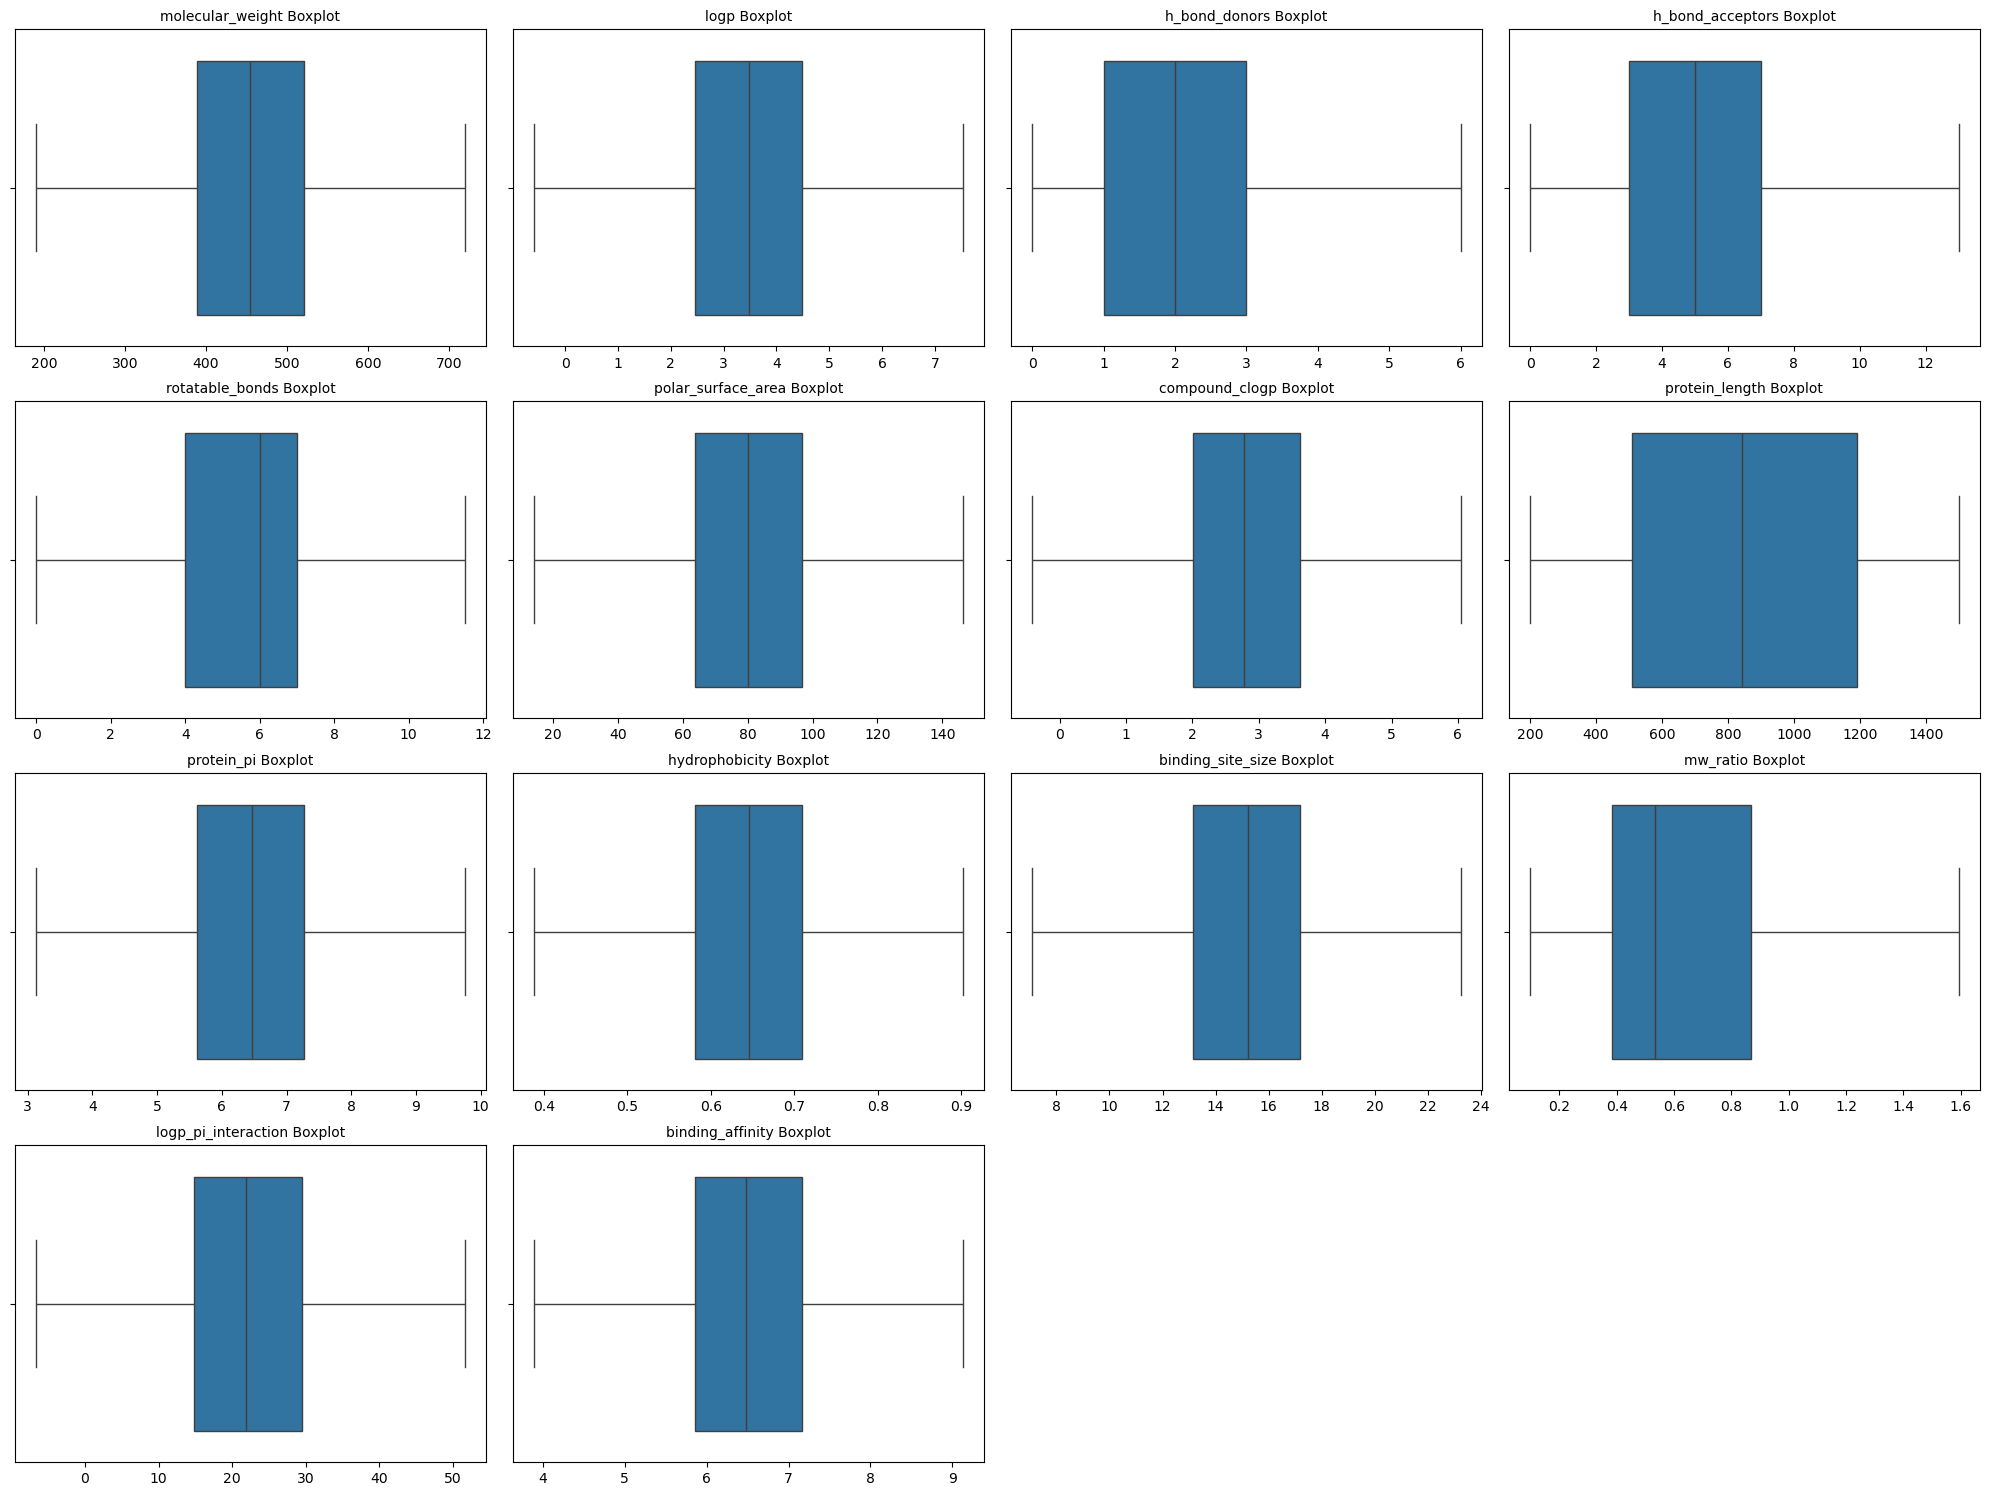

In [16]:
import math

def visualize_df(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_columns.pop() # remove active

    n_cols = 4
    n_rows = math.ceil(len(numeric_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"{col} Boxplot", fontsize=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("") 

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

visualize_df(df)

In [17]:
### Correlation

df.corr(numeric_only = True)

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
molecular_weight,1.000000,-0.031283,-0.027196,0.009847,0.004313,0.013326,0.009025,0.021016,0.013054,-0.024056,0.018320,0.281034,-0.012491,-0.019799,-0.031291
logp,-0.031283,1.000000,-0.031819,-0.007736,0.007251,0.012749,0.025598,-0.030489,0.018535,-0.004141,-0.019626,0.008121,0.830700,0.692764,0.569733
h_bond_donors,-0.027196,-0.031819,1.000000,-0.026164,0.010602,0.005325,-0.021842,0.019835,0.022803,0.027933,0.028286,-0.035667,-0.016020,-0.018067,-0.003630
h_bond_acceptors,0.009847,-0.007736,-0.026164,1.000000,-0.001900,0.008541,-0.001706,-0.043702,-0.024149,-0.022506,-0.008338,0.042813,-0.012013,-0.008454,-0.021386
rotatable_bonds,0.004313,0.007251,0.010602,-0.001900,1.000000,0.023889,0.013146,-0.008757,-0.003498,0.007330,-0.021982,0.013090,0.012231,0.020828,0.004284
polar_surface_area,0.013326,0.012749,0.005325,0.008541,0.023889,1.000000,-0.008150,-0.008495,-0.001948,0.012772,0.014273,0.021387,0.024780,0.014913,0.040818
compound_clogp,0.009025,0.025598,-0.021842,-0.001706,0.013146,-0.008150,1.000000,-0.022826,-0.042545,0.031482,-0.030057,0.011899,0.001259,-0.004480,-0.010805
protein_length,0.021016,-0.030489,0.019835,-0.043702,-0.008757,-0.008495,-0.022826,1.000000,0.003796,0.016107,-0.018431,-0.860634,-0.017774,0.053069,0.017372
protein_pi,0.013054,0.018535,0.022803,-0.024149,-0.003498,-0.001948,-0.042545,0.003796,1.000000,-0.001255,-0.006061,0.003626,0.409922,0.327215,0.307993
hydrophobicity,-0.024056,-0.004141,0.027933,-0.022506,0.007330,0.012772,0.031482,0.016107,-0.001255,1.000000,0.005310,-0.019886,-0.010277,0.023007,0.035389


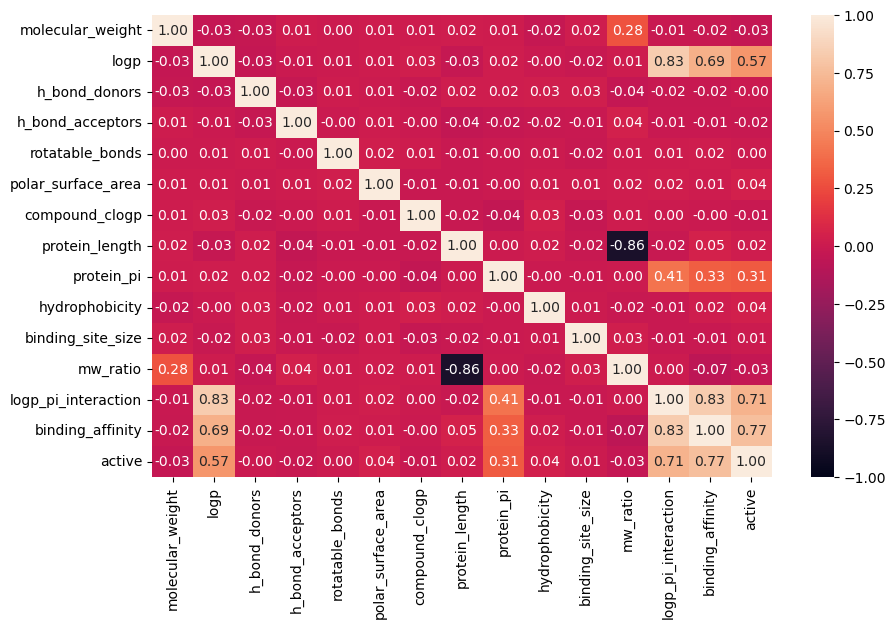

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(data = df.corr(numeric_only = True), cbar=True, vmin= -1 , vmax= 1, fmt= ".2f", annot=True) 
plt.show();

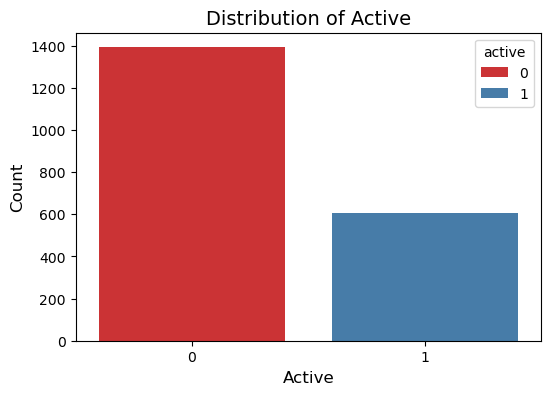

active
0    69.6
1    30.4
Name: proportion, dtype: float64


In [40]:
# Plot the distribution of active
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='active', hue= 'active', palette='Set1')
plt.title('Distribution of Active', fontsize=14)
plt.xlabel('Active', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate the percentage of diabetic and non-diabetic patients
active_counts = df['active'].value_counts(normalize=True) * 100
print(active_counts)

In [41]:
df.active.value_counts()

active
0    1392
1     608
Name: count, dtype: int64

### Data Pre-processing/Feature Engineering

In [19]:
df.head(2)

,compound_id,protein_id,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
0,CID_00000,PID_361,499.671415,2.487233,1.0,7.0,4.0,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665,0
1,CID_00001,PID_165,436.173570,3.283222,3.0,4.0,4.0,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742,0


In [20]:
### Features and Label

# x = Features
# y = Label

In [21]:
x = df.drop(['active',"compound_id",'protein_id'], axis=1)
y = df['active']

In [22]:
x.head(2)

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity
0,499.671415,2.487233,1.0,7.0,4.0,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665
1,436.173570,3.283222,3.0,4.0,4.0,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742


In [23]:
y.head(3)

0    0
1    0
2    0
Name: active, dtype: int64

### Data Splitting

In [24]:
print(f"Data contained {len(x)} records before splitting")

Data contained 2000 records before splitting


In [25]:
# Splitting Data into Training and Test sets 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
xtrain.head()

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity
968,445.984205,3.479480,2.0,3.0,10.0,38.912343,0.405543,926,5.699176,0.649906,11.559176,0.481624,4.383208,4.568440
240,370.747926,3.658842,2.0,5.0,4.0,69.161400,3.642896,316,4.679072,0.726559,11.750024,1.173253,17.119982,6.203188
819,556.548038,0.608491,2.0,5.0,4.0,63.771314,1.813300,506,4.295283,0.672123,15.101221,1.099897,2.613642,4.790822
692,341.893667,3.441039,3.0,3.0,4.0,135.094771,3.335370,902,5.051054,0.556628,17.410754,0.379040,17.380873,9.127585
420,656.074792,5.070977,1.0,5.0,5.0,110.759179,3.924607,770,5.089445,0.664842,17.766543,0.852045,25.808457,5.987767


In [27]:
xtest.head()

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity
1860,436.569126,2.822076,3.0,5.0,6.0,74.509606,3.269354,917,6.725938,0.831197,13.982244,0.476084,18.981107,6.524980
353,434.006147,1.451066,3.0,8.0,4.0,80.026470,3.196038,661,6.348135,0.670554,13.968502,0.656590,9.211566,5.287899
1333,599.072614,4.361107,2.0,3.0,9.0,65.674878,2.193108,1147,9.435127,0.648173,14.153056,0.522295,41.147596,8.408469
905,454.643655,4.625869,1.0,4.0,3.0,89.001384,2.465116,600,6.474947,0.747847,14.928421,0.757739,29.952256,7.117896
1289,234.710941,3.067942,3.0,4.0,7.0,84.049278,3.401487,559,4.972109,0.657435,11.015914,0.419876,15.254139,5.664968


In [28]:
len(xtest) == len(ytest)

True

In [29]:
len(xtrain) == len(ytrain)

True

### Model Training

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [31]:
# Check if scaling is successful the minimum and maximum values for each feature
print("Minimum values per feature:\n", xtrain_scaled.min(axis=0))
print("Maximum values per feature:\n", xtrain_scaled.max(axis=0))

Minimum values per feature:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum values per feature:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Train Models

In [32]:
# Initialize and train models

Classifiers = [[SGDClassifier(random_state = 42), 'sdg_model'], 
               [DecisionTreeClassifier(random_state = 42), 'dt_model'], 
               [LogisticRegression(random_state = 42),'lr_model'], 
               [RandomForestClassifier(random_state = 42), 'rf_model'],
               [XGBClassifier(random_state = 42), 'xgb_model'],
               [SVC(random_state =42), 'svc_model'],
               [KNeighborsClassifier(), 'knn_model'],
               [GaussianNB(), 'nb_model']
              ]

In [33]:
Classifiers

[[SGDClassifier(random_state=42), 'sdg_model'],
 [DecisionTreeClassifier(random_state=42), 'dt_model'],
 [LogisticRegression(random_state=42), 'lr_model'],
 [RandomForestClassifier(random_state=42), 'rf_model'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  'x

<---sdg_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    1.00000   0.95506   0.97701       267
           1    0.91724   1.00000   0.95683       133

    accuracy                        0.97000       400
   macro avg    0.95862   0.97753   0.96692       400
weighted avg    0.97248   0.97000   0.97030       400

Confusion Matrix: 
 [[255  12]
 [  0 133]]
Accuracy scores: [0.96875  0.959375 0.965625 0.98125  0.99375 ]
Mean accuracy: 97.38%

Precision scores: [0.98850575 0.95555556 0.90384615 0.98901099 0.97938144]
Mean precision: 96.33%

Recall scores: [0.90526316 0.90526316 0.98947368 0.94736842 1.        ]
Mean recall: 94.95%

F1 scores: [0.94505495 0.92972973 0.94472362 0.96774194 0.98958333]
Mean f1: 95.54%

Roc_auc scores: [0.99822222 0.99560234 0.99845614 0.99957895 0.99985965]
Mean roc_auc: 99.83%


Cross-Validation Scores: [0.96875  0.959375 0.965625 0.98125  0.99375 ]
Mean CV Score - Scaled Model Training: 97.38%
---------

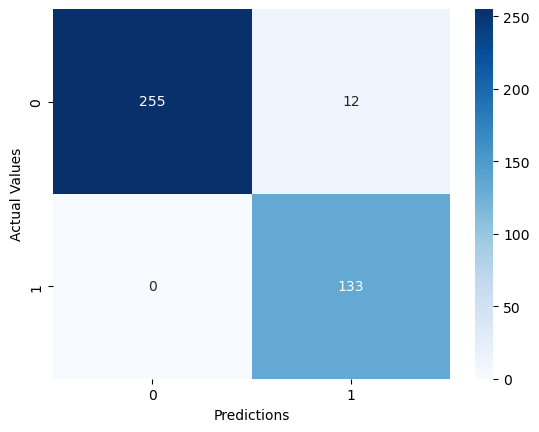

--------------------------------------------------
<---dt_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       267
           1    1.00000   1.00000   1.00000       133

    accuracy                        1.00000       400
   macro avg    1.00000   1.00000   1.00000       400
weighted avg    1.00000   1.00000   1.00000       400

Confusion Matrix: 
 [[267   0]
 [  0 133]]
Accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 100.00%

Precision scores: [1. 1. 1. 1. 1.]
Mean precision: 100.00%

Recall scores: [1. 1. 1. 1. 1.]
Mean recall: 100.00%

F1 scores: [1. 1. 1. 1. 1.]
Mean f1: 100.00%

Roc_auc scores: [1. 1. 1. 1. 1.]
Mean roc_auc: 100.00%


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score - Scaled Model Training: 100.00%
--------------------------------------------------


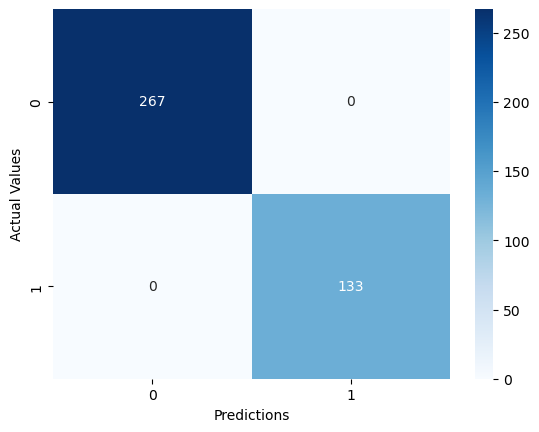

--------------------------------------------------
<---lr_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.92982   0.99251   0.96014       267
           1    0.98261   0.84962   0.91129       133

    accuracy                        0.94500       400
   macro avg    0.95622   0.92107   0.93572       400
weighted avg    0.94738   0.94500   0.94390       400

Confusion Matrix: 
 [[265   2]
 [ 20 113]]
Accuracy scores: [0.95     0.93125  0.953125 0.971875 0.975   ]
Mean accuracy: 95.62%

Precision scores: [0.96470588 0.91954023 0.94444444 0.97777778 0.97802198]
Mean precision: 95.69%

Recall scores: [0.86315789 0.84210526 0.89473684 0.92631579 0.93684211]
Mean recall: 89.26%

F1 scores: [0.91111111 0.87912088 0.91891892 0.95135135 0.95698925]
Mean f1: 92.35%

Roc_auc scores: [0.99363743 0.98432749 0.99396491 0.99139181 0.99653801]
Mean roc_auc: 99.20%


Cross-Validation Scores: [0.95     0.93125  0.953125 0.971875 0.975   ]
Mean 

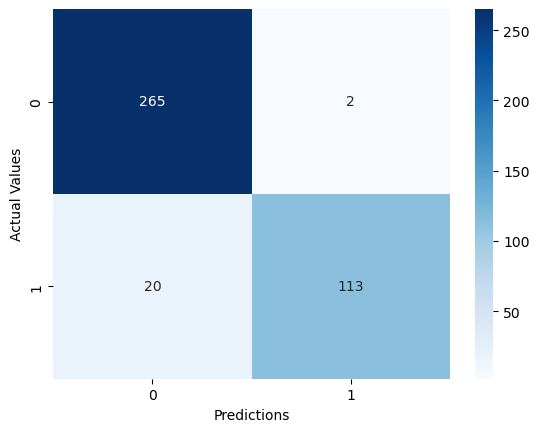

--------------------------------------------------
<---rf_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       267
           1    1.00000   1.00000   1.00000       133

    accuracy                        1.00000       400
   macro avg    1.00000   1.00000   1.00000       400
weighted avg    1.00000   1.00000   1.00000       400

Confusion Matrix: 
 [[267   0]
 [  0 133]]
Accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 100.00%

Precision scores: [1. 1. 1. 1. 1.]
Mean precision: 100.00%

Recall scores: [1. 1. 1. 1. 1.]
Mean recall: 100.00%

F1 scores: [1. 1. 1. 1. 1.]
Mean f1: 100.00%

Roc_auc scores: [1. 1. 1. 1. 1.]
Mean roc_auc: 100.00%


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score - Scaled Model Training: 100.00%
--------------------------------------------------


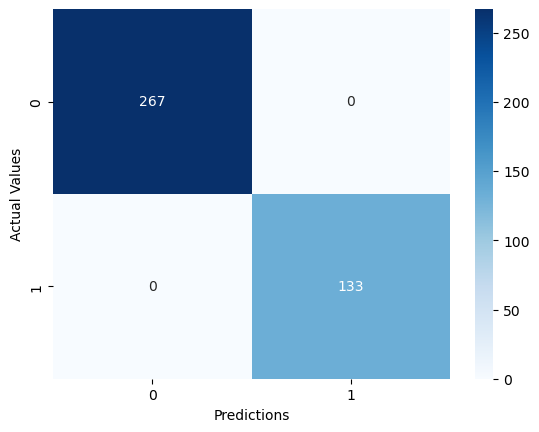

--------------------------------------------------
<---xgb_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.99627   1.00000   0.99813       267
           1    1.00000   0.99248   0.99623       133

    accuracy                        0.99750       400
   macro avg    0.99813   0.99624   0.99718       400
weighted avg    0.99751   0.99750   0.99750       400

Confusion Matrix: 
 [[267   0]
 [  1 132]]
Accuracy scores: [0.99375  1.       0.996875 1.       0.996875]
Mean accuracy: 99.75%

Precision scores: [1.         1.         1.         1.         0.98958333]
Mean precision: 99.79%

Recall scores: [0.97894737 1.         0.98947368 1.         1.        ]
Mean recall: 99.37%

F1 scores: [0.9893617  1.         0.99470899 1.         0.9947644 ]
Mean f1: 99.58%

Roc_auc scores: [1.         1.         0.99995322 1.         1.        ]
Mean roc_auc: 100.00%


Cross-Validation Scores: [0.99375  1.       0.996875 1.       0.996875]
Mea

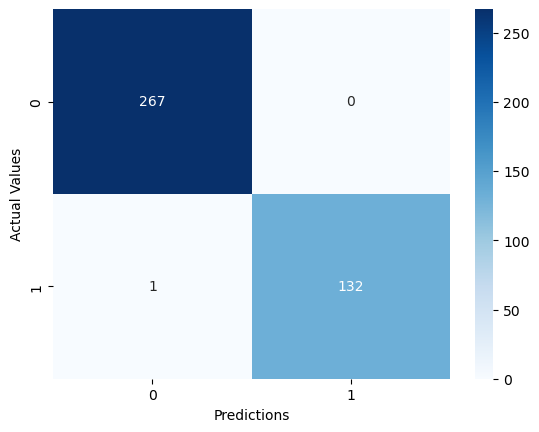

--------------------------------------------------
<---svc_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.94326   0.99625   0.96903       267
           1    0.99153   0.87970   0.93227       133

    accuracy                        0.95750       400
   macro avg    0.96739   0.93798   0.95065       400
weighted avg    0.95931   0.95750   0.95681       400

Confusion Matrix: 
 [[266   1]
 [ 16 117]]
Accuracy scores: [0.971875 0.921875 0.965625 0.9625   0.96875 ]
Mean accuracy: 95.81%

Precision scores: [0.9673913  0.88888889 0.96666667 0.94623656 0.96703297]
Mean precision: 94.72%

Recall scores: [0.93684211 0.84210526 0.91578947 0.92631579 0.92631579]
Mean recall: 90.95%

F1 scores: [0.95187166 0.86486486 0.94054054 0.93617021 0.94623656]
Mean f1: 92.79%

Roc_auc scores: [0.99527485 0.98306433 0.99298246 0.99443275 0.99447953]
Mean roc_auc: 99.20%


Cross-Validation Scores: [0.971875 0.921875 0.965625 0.9625   0.96875 ]
Mean

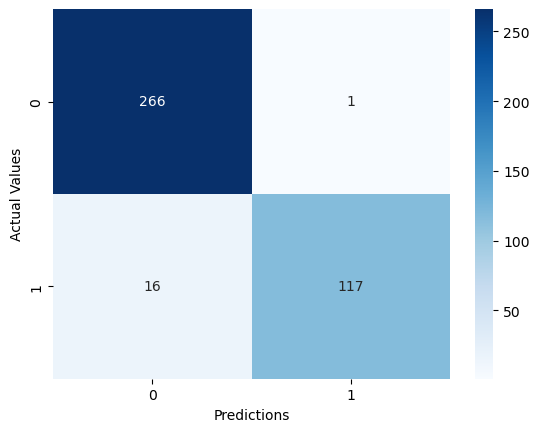

--------------------------------------------------
<---knn_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.86469   0.98127   0.91930       267
           1    0.94845   0.69173   0.80000       133

    accuracy                        0.88500       400
   macro avg    0.90657   0.83650   0.85965       400
weighted avg    0.89254   0.88500   0.87963       400

Confusion Matrix: 
 [[262   5]
 [ 41  92]]
Accuracy scores: [0.859375 0.89375  0.89375  0.909375 0.890625]
Mean accuracy: 88.94%

Precision scores: [0.84722222 0.85882353 0.87654321 0.89285714 0.84090909]
Mean precision: 86.33%

Recall scores: [0.64210526 0.76842105 0.74736842 0.78947368 0.77894737]
Mean recall: 74.53%

F1 scores: [0.73053892 0.81111111 0.80681818 0.83798883 0.80874317]
Mean f1: 79.90%

Roc_auc scores: [0.93394152 0.95756725 0.94746199 0.94327485 0.93155556]
Mean roc_auc: 94.28%


Cross-Validation Scores: [0.859375 0.89375  0.89375  0.909375 0.890625]
Mean

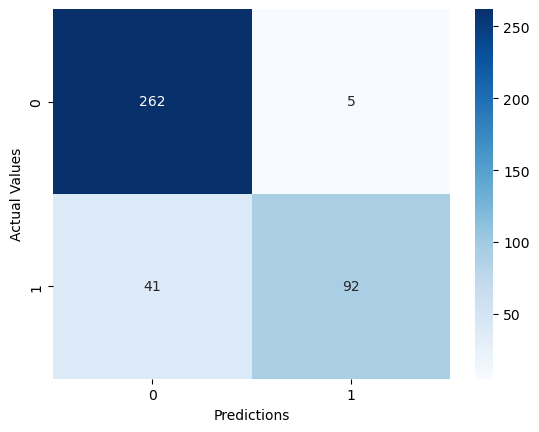

--------------------------------------------------
<---nb_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.94096   0.95506   0.94796       267
           1    0.90698   0.87970   0.89313       133

    accuracy                        0.93000       400
   macro avg    0.92397   0.91738   0.92054       400
weighted avg    0.92966   0.93000   0.92973       400

Confusion Matrix: 
 [[255  12]
 [ 16 117]]
Accuracy scores: [0.959375 0.909375 0.946875 0.946875 0.96875 ]
Mean accuracy: 94.62%

Precision scores: [0.92708333 0.84375    0.88235294 0.875      0.94736842]
Mean precision: 89.51%

Recall scores: [0.93684211 0.85263158 0.94736842 0.95789474 0.94736842]
Mean recall: 92.84%

F1 scores: [0.93193717 0.84816754 0.91370558 0.91457286 0.94736842]
Mean f1: 91.12%

Roc_auc scores: [0.98989474 0.97688889 0.99157895 0.9862924  0.9888655 ]
Mean roc_auc: 98.67%


Cross-Validation Scores: [0.959375 0.909375 0.946875 0.946875 0.96875 ]
Mean 

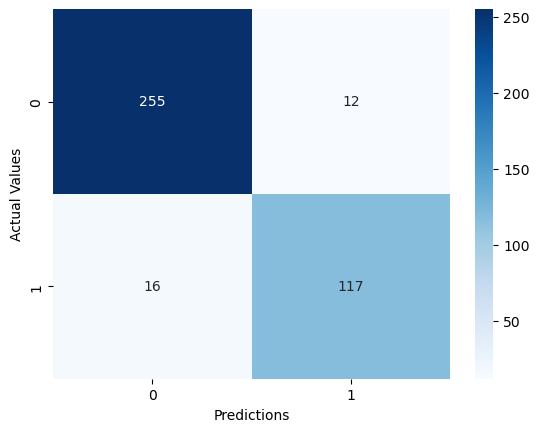

--------------------------------------------------


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate


for Classifier in Classifiers:
    model = Classifier[0]
    model_name = Classifier[1]
    print(f"<---{model_name}--->")
    
    # Fit model
    model.fit(xtrain_scaled, ytrain)
    model_pred = model.predict(xtest_scaled)

    # Classification report & confusion matrix
    report = classification_report(ytest, model_pred, digits=5)
    matrix = confusion_matrix(ytest, model_pred)

    print("Classification Report: \n", report)
    print("Confusion Matrix: \n", matrix)
    
    # multiple metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(model, xtrain_scaled, ytrain, cv=5, scoring= scoring)

    for metric in scoring:
        scores = cv_results[f'test_{metric}']
        print(f"{metric.capitalize()} scores: {scores}")
        print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

    # Cross-Validate Models
    cv_scores = cross_val_score(model, xtrain_scaled, ytrain, cv = 5)
    mean_cv_score_percentage = cv_scores.mean() * 100
    print(f'\nCross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score - Scaled Model Training: {mean_cv_score_percentage:.2f}%')
    print("-" * 50)

    # Heatmap
    sns.heatmap(matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel("Predictions")
    plt.ylabel("Actual Values")
    plt.show()
    print("-" * 50)

<--- sdg_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    1.00000   0.95506   0.97701       267
           1    0.91724   1.00000   0.95683       133

    accuracy                        0.97000       400
   macro avg    0.95862   0.97753   0.96692       400
weighted avg    0.97248   0.97000   0.97030       400

Confusion Matrix: 
 [[255  12]
 [  0 133]]
Mean Accuracy: 97.38%
Mean Precision: 96.33%
Mean Recall: 94.95%
Mean F1-Score: 95.54%
Mean ROC-AUC: 99.83%
------------------------------------------------------------


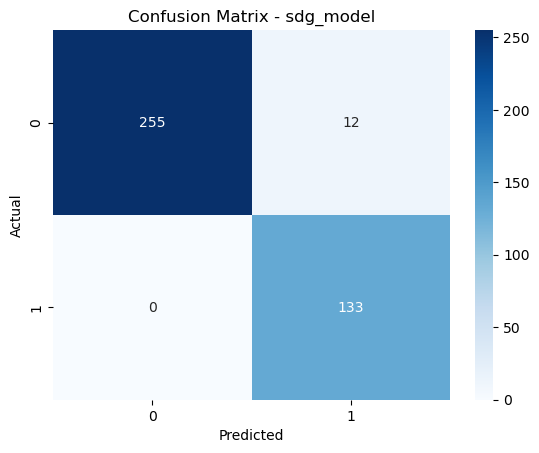

<--- dt_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       267
           1    1.00000   1.00000   1.00000       133

    accuracy                        1.00000       400
   macro avg    1.00000   1.00000   1.00000       400
weighted avg    1.00000   1.00000   1.00000       400

Confusion Matrix: 
 [[267   0]
 [  0 133]]
Mean Accuracy: 100.00%
Mean Precision: 100.00%
Mean Recall: 100.00%
Mean F1-Score: 100.00%
Mean ROC-AUC: 100.00%
------------------------------------------------------------


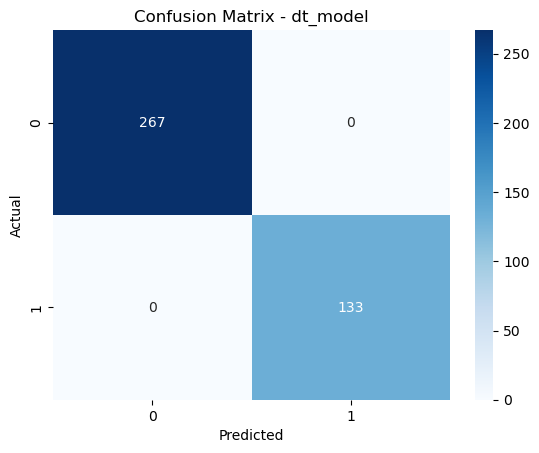

<--- lr_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    0.92982   0.99251   0.96014       267
           1    0.98261   0.84962   0.91129       133

    accuracy                        0.94500       400
   macro avg    0.95622   0.92107   0.93572       400
weighted avg    0.94738   0.94500   0.94390       400

Confusion Matrix: 
 [[265   2]
 [ 20 113]]
Mean Accuracy: 95.62%
Mean Precision: 95.69%
Mean Recall: 89.26%
Mean F1-Score: 92.35%
Mean ROC-AUC: 99.20%
------------------------------------------------------------


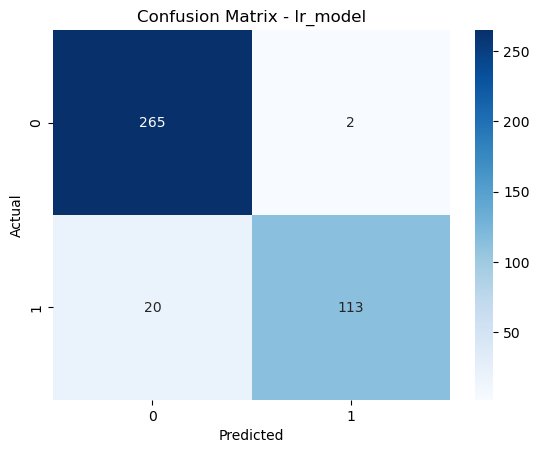

<--- rf_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       267
           1    1.00000   1.00000   1.00000       133

    accuracy                        1.00000       400
   macro avg    1.00000   1.00000   1.00000       400
weighted avg    1.00000   1.00000   1.00000       400

Confusion Matrix: 
 [[267   0]
 [  0 133]]
Mean Accuracy: 100.00%
Mean Precision: 100.00%
Mean Recall: 100.00%
Mean F1-Score: 100.00%
Mean ROC-AUC: 100.00%
------------------------------------------------------------


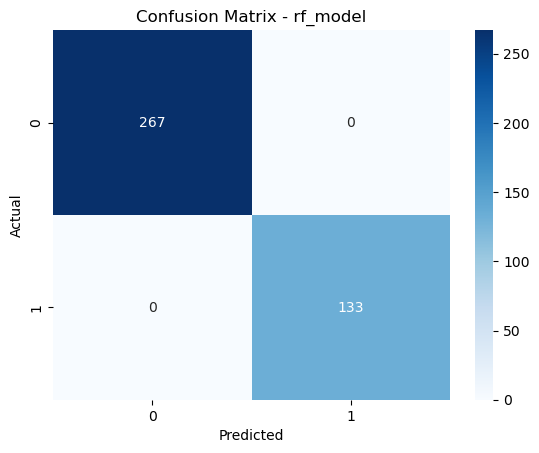

<--- xgb_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    0.99627   1.00000   0.99813       267
           1    1.00000   0.99248   0.99623       133

    accuracy                        0.99750       400
   macro avg    0.99813   0.99624   0.99718       400
weighted avg    0.99751   0.99750   0.99750       400

Confusion Matrix: 
 [[267   0]
 [  1 132]]
Mean Accuracy: 99.75%
Mean Precision: 99.79%
Mean Recall: 99.37%
Mean F1-Score: 99.58%
Mean ROC-AUC: 100.00%
------------------------------------------------------------


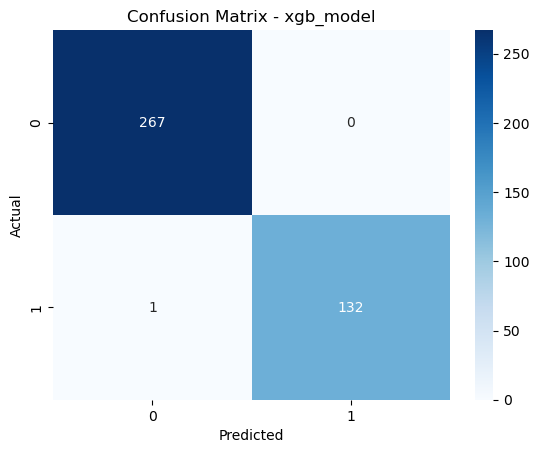

<--- svc_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    0.94326   0.99625   0.96903       267
           1    0.99153   0.87970   0.93227       133

    accuracy                        0.95750       400
   macro avg    0.96739   0.93798   0.95065       400
weighted avg    0.95931   0.95750   0.95681       400

Confusion Matrix: 
 [[266   1]
 [ 16 117]]
Mean Accuracy: 95.81%
Mean Precision: 94.72%
Mean Recall: 90.95%
Mean F1-Score: 92.79%
Mean ROC-AUC: 99.20%
------------------------------------------------------------


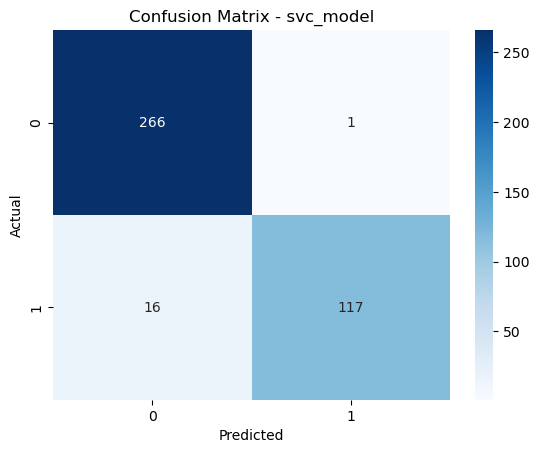

<--- knn_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    0.86469   0.98127   0.91930       267
           1    0.94845   0.69173   0.80000       133

    accuracy                        0.88500       400
   macro avg    0.90657   0.83650   0.85965       400
weighted avg    0.89254   0.88500   0.87963       400

Confusion Matrix: 
 [[262   5]
 [ 41  92]]
Mean Accuracy: 88.94%
Mean Precision: 86.33%
Mean Recall: 74.53%
Mean F1-Score: 79.90%
Mean ROC-AUC: 94.28%
------------------------------------------------------------


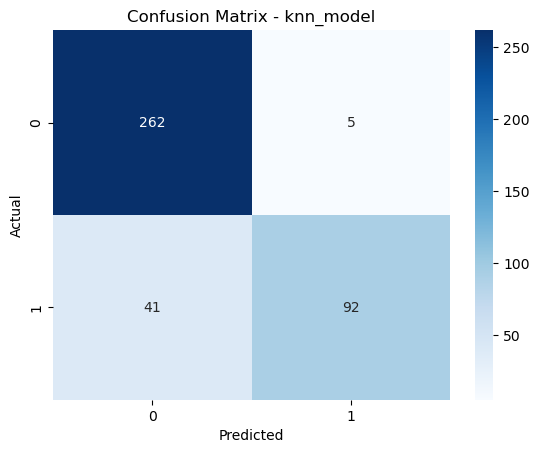

<--- nb_model --->
Classification Report: 
               precision    recall  f1-score   support

           0    0.94096   0.95506   0.94796       267
           1    0.90698   0.87970   0.89313       133

    accuracy                        0.93000       400
   macro avg    0.92397   0.91738   0.92054       400
weighted avg    0.92966   0.93000   0.92973       400

Confusion Matrix: 
 [[255  12]
 [ 16 117]]
Mean Accuracy: 94.62%
Mean Precision: 89.51%
Mean Recall: 92.84%
Mean F1-Score: 91.12%
Mean ROC-AUC: 98.67%
------------------------------------------------------------


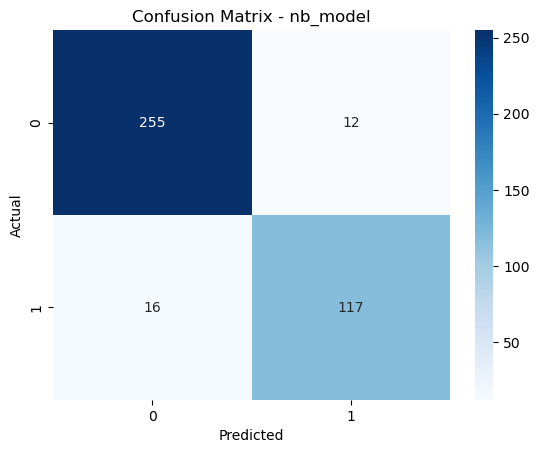

In [35]:
# Create empty list to store results
model_results = []

# Evaluate multiple classifiers
for Classifier in Classifiers:
    model = Classifier[0]
    model_name = Classifier[1]
    print(f"<--- {model_name} --->")

    # Fit model
    model.fit(xtrain_scaled, ytrain)
    model_pred = model.predict(xtest_scaled)

    # Classification report & confusion matrix
    report = classification_report(ytest, model_pred, digits=5)
    matrix = confusion_matrix(ytest, model_pred)

    print("Classification Report: \n", report)
    print("Confusion Matrix: \n", matrix)
    
    # Metrics for evaluation
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(model, xtrain_scaled, ytrain, cv=5, scoring=scoring)
    
    # Extract mean scores
    acc = np.mean(cv_results['test_accuracy'])
    prec = np.mean(cv_results['test_precision'])
    rec = np.mean(cv_results['test_recall'])
    f1 = np.mean(cv_results['test_f1'])
    roc = np.mean(cv_results['test_roc_auc'])
    
    # Append to results
    model_results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc
    })
    
    # Print mean metrics
    print(f"Mean Accuracy: {acc*100:.2f}%")
    print(f"Mean Precision: {prec*100:.2f}%")
    print(f"Mean Recall: {rec*100:.2f}%")
    print(f"Mean F1-Score: {f1*100:.2f}%")
    print(f"Mean ROC-AUC: {roc*100:.2f}%")
    print("-" * 60)
    
    # Confusion Matrix Visualization
    sns.heatmap(matrix, annot=True, fmt='g', cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [36]:
results_df = pd.DataFrame(model_results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,sdg_model,0.973750,0.963260,0.949474,0.955367,0.998344
1,dt_model,1.000000,1.000000,1.000000,1.000000,1.000000
2,lr_model,0.956250,0.956898,0.892632,0.923498,0.991972
3,rf_model,1.000000,1.000000,1.000000,1.000000,1.000000
4,xgb_model,0.997500,0.997917,0.993684,0.995767,0.999991
5,svc_model,0.958125,0.947243,0.909474,0.927937,0.992047
6,knn_model,0.889375,0.863271,0.745263,0.799040,0.942760
7,nb_model,0.946250,0.895111,0.928421,0.911150,0.986704


In [37]:
# Convert results to DataFrame
results_df = pd.DataFrame(model_results)

# Convert all metric columns (except 'Model') to percentages
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    results_df[col] = results_df[col] * 100

# Display DataFrame with percentage metrics
print("\n=== Model Performance Summary (in %) ===")
print(results_df)


=== Model Performance Summary (in %) ===
       Model  Accuracy   Precision      Recall    F1-Score     ROC-AUC
0  sdg_model   97.3750   96.325998   94.947368   95.536671   99.834386
1   dt_model  100.0000  100.000000  100.000000  100.000000  100.000000
2   lr_model   95.6250   95.689806   89.263158   92.349830   99.197193
3   rf_model  100.0000  100.000000  100.000000  100.000000  100.000000
4  xgb_model   99.7500   99.791667   99.368421   99.576702   99.999064
5  svc_model   95.8125   94.724328   90.947368   92.793677   99.204678
6  knn_model   88.9375   86.327104   74.526316   79.904004   94.276023
7   nb_model   94.6250   89.511094   92.842105   91.115032   98.670409
